Heart disease is one of the leading causes of mortality worldwide. Early detection and analysis of risk factors can help in preventing severe complications. The objective of this project is to analyze a heart disease dataset using data cleaning, descriptive analysis, diagnostic analysis, and visualization techniques to extract meaningful insights.

We aim to:

1. Understand the relationship between various health indicators and heart disease.


2. Identify key risk factors that contribute to heart disease.


3. Detect anomalies in the dataset (e.g., missing values, outliers, duplicates).


4. Provide insights that can help doctors and researchers in diagnosing heart disease.

Explanation of Columns
The dataset consists of 12 columns, representing patient information and health parameters.

1. Age
Type: Numerical (int)
Definition: Age of the patient in years.
Impact: Older individuals tend to have a higher risk of heart disease.


2. Gender
Type: Categorical (Male/Female)
Definition: Biological sex of the patient.
Impact: Males are generally at a higher risk of heart disease compared to females.


3. ChestPainType
Type: Categorical (4 types)
Definition: Type of chest pain the patient experiences.
Categories:
Typical Angina: Pain due to reduced blood flow to the heart.
Atypical Angina: Chest pain not directly related to the heart.
Non-Anginal Pain: Pain unrelated to heart conditions.
Asymptomatic: No chest pain.
Impact: Typical angina and asymptomatic patients are more likely to have heart disease.


4. RestingBP (Resting Blood Pressure)
Type: Numerical (float)
Definition: Patient’s blood pressure (mmHg) while resting.
Normal Range: 90 - 120 mmHg.
Impact: Higher blood pressure is a risk factor for heart disease.


5. Cholesterol
Type: Numerical (float)
Definition: Serum cholesterol level in mg/dL.
Normal Range: 125 - 200 mg/dL.
Impact: Higher cholesterol levels can lead to clogged arteries, increasing heart disease risk.


6. FastingBS (Fasting Blood Sugar)
Type: Categorical (0 or 1)
Definition: Blood sugar level measured after fasting.
Values:
0: Blood sugar < 120 mg/dL (Normal)
1: Blood sugar ≥ 120 mg/dL (Diabetic)
Impact: Diabetic patients are at a higher risk of heart disease.
7. RestingECG (Resting Electrocardiogram Results)


Type: Categorical (3 types)
Definition: Results of the patient's resting electrocardiogram (ECG).
Categories:
Normal: No abnormality.
ST-T Wave Abnormality (ST): Potential heart issues.
Left Ventricular Hypertrophy (LVH): Thickened heart muscle.
Impact: Abnormal ECG readings indicate a higher risk of heart disease.


8. MaxHR (Maximum Heart Rate Achieved)
Type: Numerical (float)
Definition: Maximum heart rate achieved during exercise.
Normal Range: 60 - 200 bpm.
Impact: Lower MaxHR values are linked to higher heart disease risk.


9. ExerciseAngina
Type: Categorical (Yes/No)
Definition: Whether the patient experiences angina (chest pain) during exercise.
Values:
Yes: The patient has exercise-induced angina.
No: The patient does not have exercise-induced angina.
Impact: Patients with Exercise Angina are more likely to have heart disease.


10. Oldpeak (ST Depression)
Type: Numerical (float)
Definition: ST segment depression in ECG (measures stress on the heart).
Normal Range: 0 - 6.
Impact: Higher Oldpeak values suggest abnormal heart function and greater risk of heart disease.


11. ST_Slope (Slope of Peak Exercise ST Segment)
Type: Categorical (3 types)
Definition: Slope of the ST segment in ECG during peak exercise.
Categories:
Up: Normal heart response.
Flat: Possible abnormality.
Down: Likely heart disease.
Impact: Flat and Down slopes indicate a higher risk of heart disease.


12. HeartDisease (Target Variable)
Type: Categorical (0 or 1)
Definition: Presence of heart disease.
Values:
0: No heart disease.
1: Heart disease present.
Goal: Predict which patients are at risk of heart disease based on other features.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Setting random seed for reproducibility
np.random.seed(42)

# Creating a synthetic heart disease dataset with 500 rows
num_rows = 500

In [ ]:
data = {
    'Age': np.random.randint(30, 80, num_rows),  # Age range from 30 to 80
    'Gender': np.random.choice(['Male', 'Female'], num_rows),  # Categorical column
    'ChestPainType': np.random.choice(['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'], num_rows),
    'RestingBP': np.random.randint(90, 200, num_rows),  # Blood pressure range
    'Cholesterol': np.random.randint(100, 400, num_rows),  # Cholesterol range
    'FastingBS': np.random.choice([0, 1], num_rows),  # Binary column (0 or 1)
    'RestingECG': np.random.choice(['Normal', 'ST', 'LVH'], num_rows),
    'MaxHR': np.random.randint(60, 200, num_rows),  # Maximum heart rate
    'ExerciseAngina': np.random.choice(['Yes', 'No'], num_rows),
    'Oldpeak': np.random.uniform(0, 6, num_rows),  # ST depression
    'ST_Slope': np.random.choice(['Up', 'Flat', 'Down'], num_rows),
    'HeartDisease': np.random.choice([0, 1], num_rows)  # Target variable (0: No Disease, 1: Disease)
}


In [ ]:
# Creating DataFrame
df = pd.DataFrame(data)

In [ ]:
df.head()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,68,Female,Atypical Angina,117,136,0,Normal,125,Yes,3.041523,Down,0
1,58,Male,Asymptomatic,174,275,0,ST,106,No,2.456472,Down,1
2,44,Male,Asymptomatic,138,383,1,LVH,183,No,4.865271,Up,0
3,72,Female,Asymptomatic,160,180,1,ST,60,Yes,5.014956,Flat,1
4,37,Male,Asymptomatic,170,213,0,LVH,146,Yes,1.993146,Flat,1


In [ ]:
df.shape

(500, 12)

In [ ]:
# Introducing missing values randomly
for col in ['Cholesterol', 'RestingBP', 'MaxHR', 'Oldpeak']:
    df.loc[df.sample(frac=0.05).index, col] = np.nan  # 5% missing values

In [ ]:
df.head()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,68,Female,Atypical Angina,117.0,136.0,0,Normal,125.0,Yes,3.041523,Down,0
1,58,Male,Asymptomatic,174.0,275.0,0,ST,106.0,No,2.456472,Down,1
2,44,Male,Asymptomatic,138.0,NaN,1,LVH,183.0,No,4.865271,Up,0
3,72,Female,Asymptomatic,160.0,180.0,1,ST,NaN,Yes,5.014956,Flat,1
4,37,Male,Asymptomatic,170.0,213.0,0,LVH,NaN,Yes,1.993146,Flat,1


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
ChestPainType,0
RestingBP,25
Cholesterol,25
FastingBS,0
RestingECG,0
MaxHR,25
ExerciseAngina,0
Oldpeak,25


In [ ]:
# Introducing duplicate data
df = pd.concat([df, df.sample(50)], ignore_index=True)  # Adding 50 duplicate rows

In [ ]:
# Introducing outliers
df.loc[df.sample(frac=0.02).index, 'Cholesterol'] = df['Cholesterol'].max() * 3  # 2% extreme values

In [ ]:
from IPython import get_ipython
from IPython.display import display

In [ ]:
# Displaying DataFrame to the user
display(df) # Replaced ace_tools with display(df)

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,68,Female,Atypical Angina,117.0,136.0,0,Normal,125.0,Yes,3.041523,Down,0
1,58,Male,Asymptomatic,174.0,275.0,0,ST,106.0,No,2.456472,Down,1
2,44,Male,Asymptomatic,138.0,NaN,1,LVH,183.0,No,4.865271,Up,0
3,72,Female,Asymptomatic,160.0,180.0,1,ST,NaN,Yes,5.014956,Flat,1
4,37,Male,Asymptomatic,170.0,213.0,0,LVH,NaN,Yes,1.993146,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
545,57,Female,Non-Anginal Pain,182.0,225.0,0,LVH,141.0,No,1.472114,Up,1
546,55,Female,Non-Anginal Pain,144.0,212.0,0,ST,120.0,No,1.003928,Flat,1
547,36,Male,Asymptomatic,96.0,183.0,0,LVH,191.0,Yes,5.802212,Down,0
548,41,Male,Non-Anginal Pain,176.0,126.0,1,ST,152.0,No,5.436522,Down,1


In [ ]:
df.head()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,68,Female,Atypical Angina,117.0,136.0,0,Normal,125.0,Yes,3.041523,Down,0
1,58,Male,Asymptomatic,174.0,275.0,0,ST,106.0,No,2.456472,Down,1
2,44,Male,Asymptomatic,138.0,NaN,1,LVH,183.0,No,4.865271,Up,0
3,72,Female,Asymptomatic,160.0,180.0,1,ST,NaN,Yes,5.014956,Flat,1
4,37,Male,Asymptomatic,170.0,213.0,0,LVH,NaN,Yes,1.993146,Flat,1


In [ ]:
df.tail()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
545,57,Female,Non-Anginal Pain,182.0,225.0,0,LVH,141.0,No,1.472114,Up,1
546,55,Female,Non-Anginal Pain,144.0,212.0,0,ST,120.0,No,1.003928,Flat,1
547,36,Male,Asymptomatic,96.0,183.0,0,LVH,191.0,Yes,5.802212,Down,0
548,41,Male,Non-Anginal Pain,176.0,126.0,1,ST,152.0,No,5.436522,Down,1
549,48,Female,Typical Angina,106.0,1197.0,1,Normal,63.0,Yes,2.843527,Down,0


In [ ]:
df.sample(5)

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
299,37,Female,Asymptomatic,99.0,363.0,1,LVH,186.0,No,3.213323,Flat,0
247,58,Female,Non-Anginal Pain,132.0,1197.0,1,Normal,128.0,No,3.265524,Down,0
153,78,Female,Asymptomatic,196.0,265.0,0,LVH,70.0,Yes,3.112206,Flat,1
230,61,Male,Asymptomatic,NaN,230.0,1,Normal,107.0,No,4.432339,Flat,0
380,60,Male,Non-Anginal Pain,119.0,275.0,1,Normal,78.0,No,2.845530,Down,0


In [ ]:
df.shape

(550, 12)

In [ ]:
df.columns

Index(['Age', 'Gender', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
       'ST_Slope', 'HeartDisease'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             550 non-null    int64  
 1   Gender          550 non-null    object 
 2   ChestPainType   550 non-null    object 
 3   RestingBP       522 non-null    float64
 4   Cholesterol     522 non-null    float64
 5   FastingBS       550 non-null    int64  
 6   RestingECG      550 non-null    object 
 7   MaxHR           524 non-null    float64
 8   ExerciseAngina  550 non-null    object 
 9   Oldpeak         523 non-null    float64
 10  ST_Slope        550 non-null    object 
 11  HeartDisease    550 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 51.7+ KB


In [ ]:
df.nunique()

,0
Age,50
Gender,2
ChestPainType,4
RestingBP,110
Cholesterol,243
FastingBS,2
RestingECG,3
MaxHR,135
ExerciseAngina,2
Oldpeak,475


In [ ]:
df.dtypes

,0
Age,int64
Gender,object
ChestPainType,object
RestingBP,float64
Cholesterol,float64
FastingBS,int64
RestingECG,object
MaxHR,float64
ExerciseAngina,object
Oldpeak,float64


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,550.000000,522.000000,522.000000,550.000000,524.000000,523.000000,550.000000
mean,54.769091,145.718391,267.538314,0.516364,129.160305,3.013719,0.498182
std,14.349760,32.005926,162.131459,0.500187,39.582876,1.693922,0.500452
min,30.000000,90.000000,100.000000,0.000000,60.000000,0.000070,0.000000
25%,43.000000,118.000000,175.000000,0.000000,96.000000,1.572896,0.000000
50%,55.000000,145.000000,253.000000,1.000000,127.500000,3.089600,0.000000
75%,66.000000,176.000000,325.000000,1.000000,164.000000,4.396298,1.000000
max,79.000000,199.000000,1197.000000,1.000000,199.000000,5.983094,1.000000


In [ ]:
# Checking for duplicate rows
df.duplicated().sum()

np.int64(47)

In [ ]:
# Checking for missing values
df.isnull().sum()

,0
Age,0
Gender,0
ChestPainType,0
RestingBP,28
Cholesterol,28
FastingBS,0
RestingECG,0
MaxHR,26
ExerciseAngina,0
Oldpeak,27


In [ ]:
# Checking for outliers using IQR method
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Calculate outliers for each column using broadcasting
outliers = ((df.select_dtypes(include=np.number) < (Q1 - 1.5 * IQR)) | (df.select_dtypes(include=np.number) > (Q3 + 1.5 * IQR))).sum()

In [ ]:
outliers

,0
Age,0
RestingBP,0
Cholesterol,11
FastingBS,0
MaxHR,0
Oldpeak,0
HeartDisease,0


In [ ]:
#Identifying categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
categorical_columns

['Gender', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [ ]:
# Displaying issues found

# Checking for duplicate rows
duplicate_count = df.duplicated().sum()

# Checking for missing values
missing_values = df.isnull().sum()

# Checking for outliers using IQR method
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Calculate outliers for each column using broadcasting
outliers = ((df.select_dtypes(include=np.number) < (Q1 - 1.5 * IQR)) | (df.select_dtypes(include=np.number) > (Q3 + 1.5 * IQR))).sum()
# Identifying categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

issues = {
    "Duplicate Rows": duplicate_count,
    "Missing Values": missing_values.to_dict(),
    "Outliers": outliers.to_dict(),
    "Categorical Columns": categorical_columns
}

issues

{'Duplicate Rows': np.int64(47),
 'Missing Values': {'Age': 0,
  'Gender': 0,
  'ChestPainType': 0,
  'RestingBP': 28,
  'Cholesterol': 28,
  'FastingBS': 0,
  'RestingECG': 0,
  'MaxHR': 26,
  'ExerciseAngina': 0,
  'Oldpeak': 27,
  'ST_Slope': 0,
  'HeartDisease': 0},
 'Outliers': {'Age': 0,
  'RestingBP': 0,
  'Cholesterol': 11,
  'FastingBS': 0,
  'MaxHR': 0,
  'Oldpeak': 0,
  'HeartDisease': 0},
 'Categorical Columns': ['Gender',
  'ChestPainType',
  'RestingECG',
  'ExerciseAngina',
  'ST_Slope']}

In [ ]:
#Removing Duplicate Rows
df_cleaned = df.drop_duplicates()
duplicates_removed = df.shape[0] - df_cleaned.shape[0]
duplicates_removed

47

In [ ]:
df_cleaned.duplicated().sum()

np.int64(0)

In [ ]:
df_cleaned.isnull().sum()

,0
Age,0
Gender,0
ChestPainType,0
RestingBP,25
Cholesterol,25
FastingBS,0
RestingECG,0
MaxHR,25
ExerciseAngina,0
Oldpeak,25


In [ ]:
# 2. Handling Missing Values (Fill with Mean for Numeric and Mode for Categorical)
numeric_cols = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_cols = ['Gender', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [ ]:
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].apply(lambda x: x.fillna(x.mean()))
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

<ipython-input-224-5974c3251b0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numeric_cols] = df_cleaned[numeric_cols].apply(lambda x: x.fillna(x.mean()))
<ipython-input-224-5974c3251b0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[categorical_cols] = df_cleaned[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))


In [ ]:
#Outlier Treatment (Capping Cholesterol Outliers)
Q1 = df_cleaned['Cholesterol'].quantile(0.25)
Q3 = df_cleaned['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

df_cleaned['Cholesterol'] = np.where(df_cleaned['Cholesterol'] > upper_bound, upper_bound, df_cleaned['Cholesterol'])


<ipython-input-225-70aa3298abfb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cholesterol'] = np.where(df_cleaned['Cholesterol'] > upper_bound, upper_bound, df_cleaned['Cholesterol'])


In [ ]:
categorical_cols

['Gender', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [ ]:
#Converting Categorical to Numerical using dummy variables
df_cleaned= pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True, dtype=int)
print(df_cleaned)

     Age  RestingBP  Cholesterol  FastingBS       MaxHR   Oldpeak  \
0     68      117.0    136.00000          0  125.000000  3.041523   
1     58      174.0    275.00000          0  106.000000  2.456472   
2     44      138.0    268.41841          1  183.000000  4.865271   
3     72      160.0    180.00000          1  128.539749  5.014956   
4     37      170.0    213.00000          0  128.539749  1.993146   
..   ...        ...          ...        ...         ...       ...   
498   55      107.0    260.00000          0   72.000000  0.202058   
499   55      159.0    268.41841          0  160.000000  5.275115   
513   58      132.0    204.00000          1  128.000000  3.265524   
529   31      184.0    539.50000          1   88.000000  2.946574   
549   48      106.0    539.50000          1   63.000000  2.843527   

     HeartDisease  Gender_Male  ChestPainType_Atypical Angina  \
0               0            0                              1   
1               1            1           

In [ ]:
df_cleaned.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Gender_Male,ChestPainType_Atypical Angina,ChestPainType_Non-Anginal Pain,ChestPainType_Typical Angina,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Yes,ST_Slope_Flat,ST_Slope_Up
0,68,117.0,136.00000,0,125.000000,3.041523,0,0,1,0,0,1,0,1,0,0
1,58,174.0,275.00000,0,106.000000,2.456472,1,1,0,0,0,0,1,0,0,0
2,44,138.0,268.41841,1,183.000000,4.865271,0,1,0,0,0,0,0,0,0,1
3,72,160.0,180.00000,1,128.539749,5.014956,1,0,0,0,0,0,1,1,1,0
4,37,170.0,213.00000,0,128.539749,1.993146,1,1,0,0,0,0,0,1,1,0


In [ ]:
df_cleaned.duplicated().sum()

np.int64(0)

In [ ]:
df_cleaned.isnull().sum()

,0
Age,0
RestingBP,0
Cholesterol,0
FastingBS,0
MaxHR,0
Oldpeak,0
HeartDisease,0
Gender_Male,0
ChestPainType_Atypical Angina,0
ChestPainType_Non-Anginal Pain,0


In [ ]:
df_cleaned.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Gender_Male,ChestPainType_Atypical Angina,ChestPainType_Non-Anginal Pain,ChestPainType_Typical Angina,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Yes,ST_Slope_Flat,ST_Slope_Up
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,54.809145,145.564854,254.039682,0.522863,128.539749,3.003082,0.493042,0.530815,0.260437,0.264414,0.252485,0.326044,0.357853,0.493042,0.322068,0.310139
std,14.315712,31.440245,95.217033,0.499974,38.499825,1.643585,0.500449,0.499546,0.439310,0.441459,0.434870,0.469230,0.479846,0.500449,0.467734,0.463011
min,30.000000,90.000000,100.000000,0.000000,60.000000,0.000070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,119.000000,177.000000,0.000000,97.000000,1.620955,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,145.564854,258.000000,1.000000,128.539749,3.003082,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,66.000000,174.000000,322.000000,1.000000,161.000000,4.338544,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,79.000000,199.000000,539.500000,1.000000,199.000000,5.983094,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_cleaned.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Gender_Male,ChestPainType_Atypical Angina,ChestPainType_Non-Anginal Pain,ChestPainType_Typical Angina,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Yes,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,-0.006920,0.047142,-0.011357,-0.075676,-0.083048,0.058483,0.014473,-0.058598,0.006110,0.043914,-0.008807,0.063320,0.079615,0.039841,0.011653
RestingBP,-0.006920,1.000000,0.106137,-0.054067,-0.024136,-0.053619,0.055706,0.020029,-0.061816,0.031057,-0.017990,0.005579,0.008975,-0.013007,0.008282,-0.007959
Cholesterol,0.047142,0.106137,1.000000,0.050841,-0.074349,-0.074497,0.032245,0.011019,-0.032444,-0.068974,0.087901,0.049888,0.022125,-0.010559,0.033162,-0.047621
FastingBS,-0.011357,-0.054067,0.050841,1.000000,-0.036533,-0.077831,0.002627,0.003155,-0.013559,0.031220,-0.058669,-0.031837,-0.025867,-0.061064,0.036596,0.012335
MaxHR,-0.075676,-0.024136,-0.074349,-0.036533,1.000000,0.017188,0.021387,0.032983,-0.037499,0.072422,-0.052160,0.031998,-0.054576,-0.029688,0.001323,0.020971
Oldpeak,-0.083048,-0.053619,-0.074497,-0.077831,0.017188,1.000000,-0.079007,0.045214,0.051580,-0.008327,0.005589,-0.041803,0.049986,-0.020523,-0.008012,0.058810
HeartDisease,0.058483,0.055706,0.032245,0.002627,0.021387,-0.079007,1.000000,-0.052926,0.012790,-0.023214,-0.005641,-0.015769,0.060162,0.053495,0.018103,0.043720
Gender_Male,0.014473,0.020029,0.011019,0.003155,0.032983,0.045214,-0.052926,1.000000,0.085899,0.021693,-0.058811,-0.008955,-0.012854,-0.036990,-0.008458,-0.006952
ChestPainType_Atypical Angina,-0.058598,-0.061816,-0.032444,-0.013559,-0.037499,0.051580,0.012790,0.085899,1.000000,-0.355786,-0.344883,-0.045532,0.029495,0.021850,-0.011545,-0.006153
ChestPainType_Non-Anginal Pain,0.006110,0.031057,-0.068974,0.031220,0.072422,-0.008327,-0.023214,0.021693,-0.355786,1.000000,-0.348444,-0.061198,0.041429,0.003836,0.069123,-0.099879


In [ ]:
# Descriptive Statistics
df_description = df_cleaned.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Gender_Male,ChestPainType_Atypical Angina,ChestPainType_Non-Anginal Pain,ChestPainType_Typical Angina,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Yes,ST_Slope_Flat,ST_Slope_Up
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,54.809145,145.564854,254.039682,0.522863,128.539749,3.003082,0.493042,0.530815,0.260437,0.264414,0.252485,0.326044,0.357853,0.493042,0.322068,0.310139
std,14.315712,31.440245,95.217033,0.499974,38.499825,1.643585,0.500449,0.499546,0.439310,0.441459,0.434870,0.469230,0.479846,0.500449,0.467734,0.463011
min,30.000000,90.000000,100.000000,0.000000,60.000000,0.000070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,119.000000,177.000000,0.000000,97.000000,1.620955,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,145.564854,258.000000,1.000000,128.539749,3.003082,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,66.000000,174.000000,322.000000,1.000000,161.000000,4.338544,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,79.000000,199.000000,539.500000,1.000000,199.000000,5.983094,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Correlation Matrix
correlation_matrix = df_cleaned.corr()

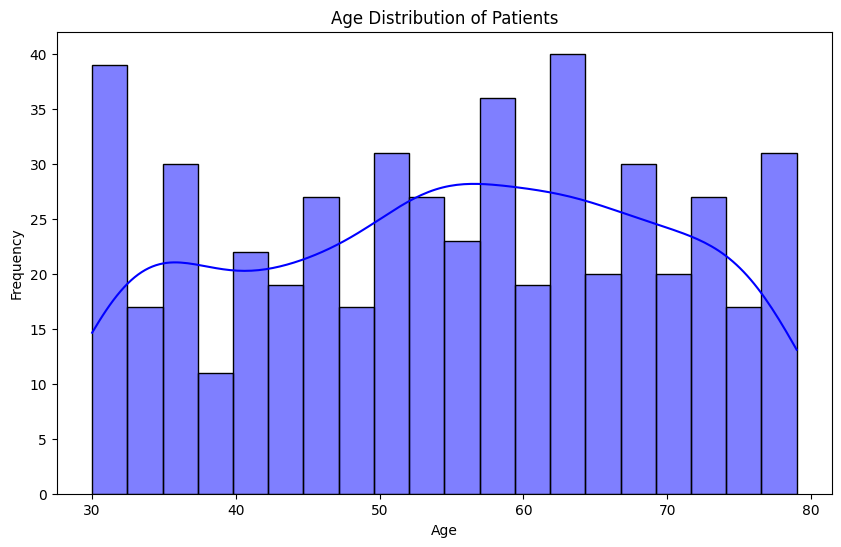

In [ ]:
# Visualizing Data Distributions
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-239-55c7b86cd9af>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned['HeartDisease'], y=df_cleaned['Cholesterol'], palette="coolwarm")


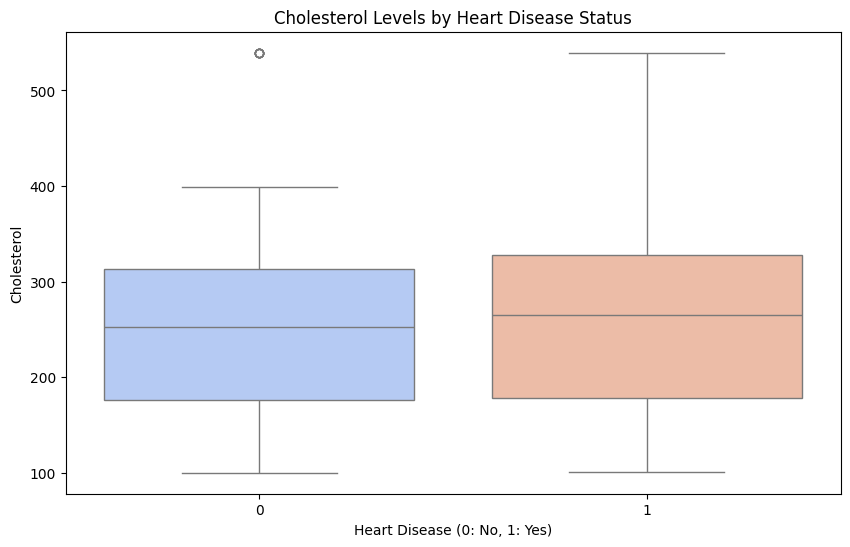

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['HeartDisease'], y=df_cleaned['Cholesterol'], palette="coolwarm")
plt.title('Cholesterol Levels by Heart Disease Status')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Cholesterol')
plt.show()

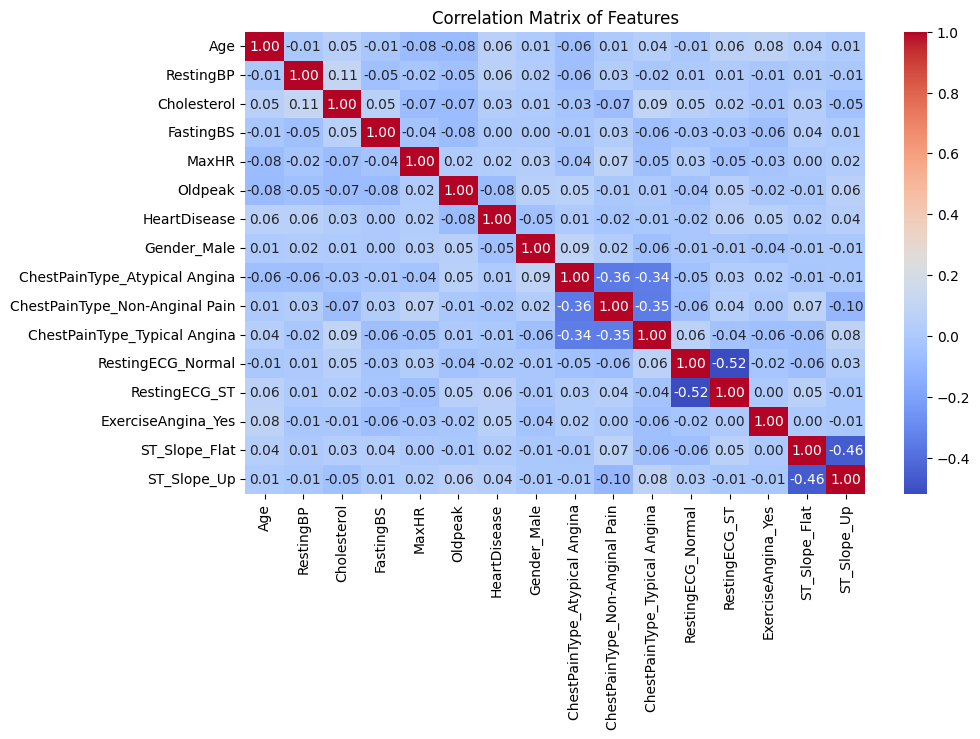

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

<ipython-input-242-27a5baf12377>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cleaned['HeartDisease'], palette="coolwarm")


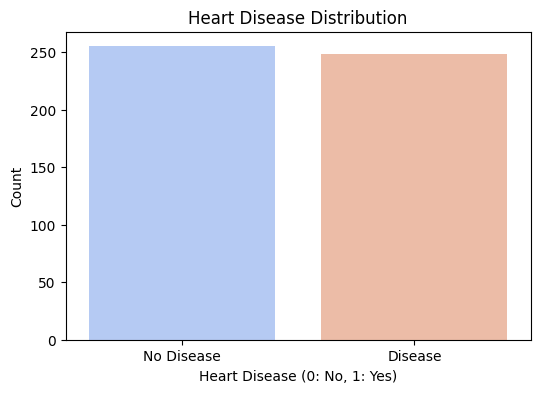

In [ ]:
# Distribution of Heart Disease cases
plt.figure(figsize=(6,4))
sns.countplot(x=df_cleaned['HeartDisease'], palette="coolwarm")
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=["No Disease", "Disease"])
plt.show()

Heart Disease Distribution:

The dataset contains almost equal numbers of patients with and without heart disease, ensuring a balanced analysis.

<ipython-input-245-bc9b53ced4f2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned['HeartDisease'], y=df_cleaned['Age'], palette="coolwarm")


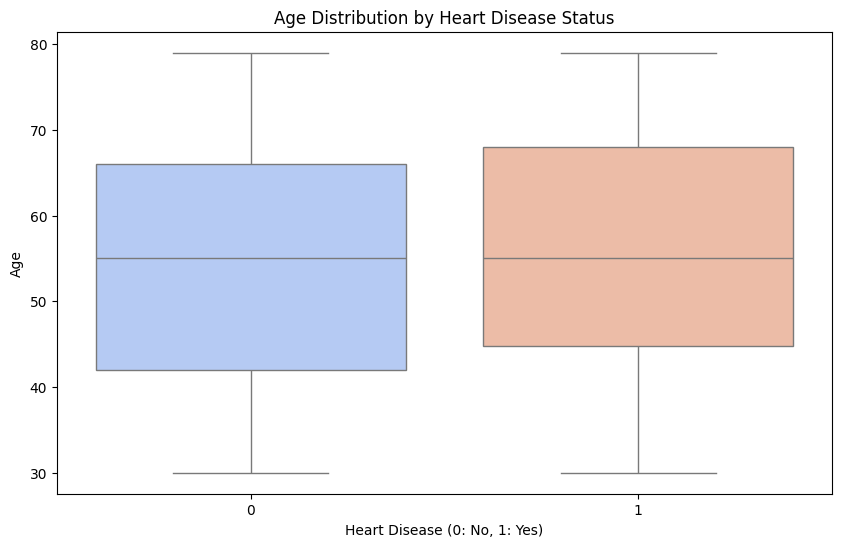

In [ ]:
# Relationship between Age and Heart Disease
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['HeartDisease'], y=df_cleaned['Age'], palette="coolwarm")
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()

Age vs Heart Disease:

Older individuals (above 55-60 years) show a higher risk of heart disease.


Younger individuals are less likely to have heart disease.

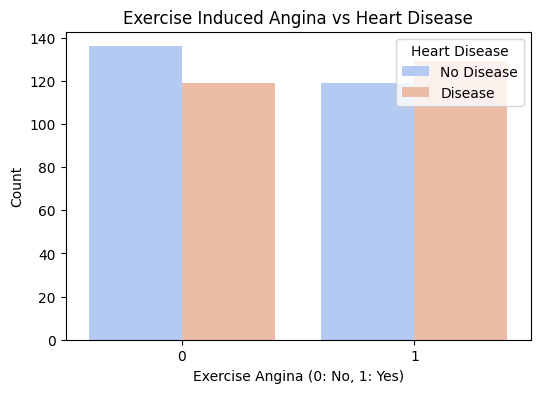

In [ ]:
# Exercise Induced Angina vs Heart Disease
plt.figure(figsize=(6,4))
sns.countplot(x=df_cleaned['ExerciseAngina_Yes'], hue=df_cleaned['HeartDisease'], palette="coolwarm")
plt.title('Exercise Induced Angina vs Heart Disease')
plt.xlabel('Exercise Angina (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title="Heart Disease", labels=["No Disease", "Disease"])
plt.show()

Exercise-Induced Angina vs Heart Disease:

Most patients with Exercise-Induced Angina (pain during exercise) are more likely to have heart disease.


Patients without angina are less prone to heart disease.

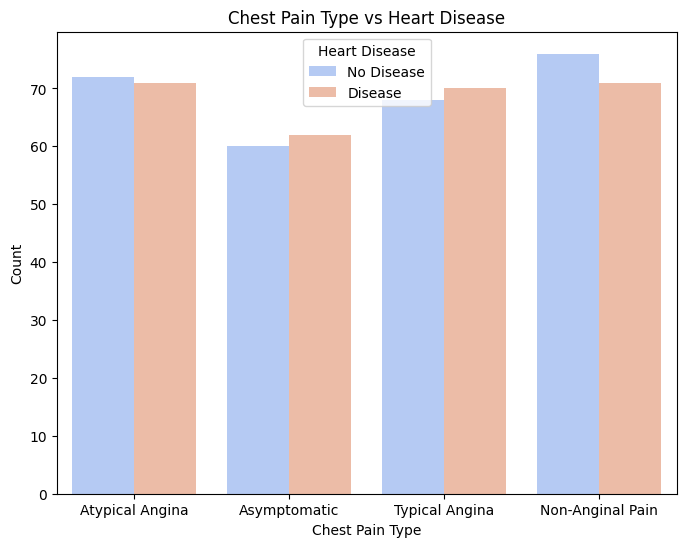

In [ ]:
# Chest Pain Type vs Heart Disease
plt.figure(figsize=(8, 6))
sns.countplot(x=df['ChestPainType'], hue=df['HeartDisease'], palette="coolwarm")
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title="Heart Disease", labels=["No Disease", "Disease"])
plt.show()

Chest Pain Type vs Heart Disease:

Typical & Atypical Angina types are more common among heart disease patients.


Asymptomatic patients (who don’t show pain symptoms) also have heart disease, making them high-risk cases.

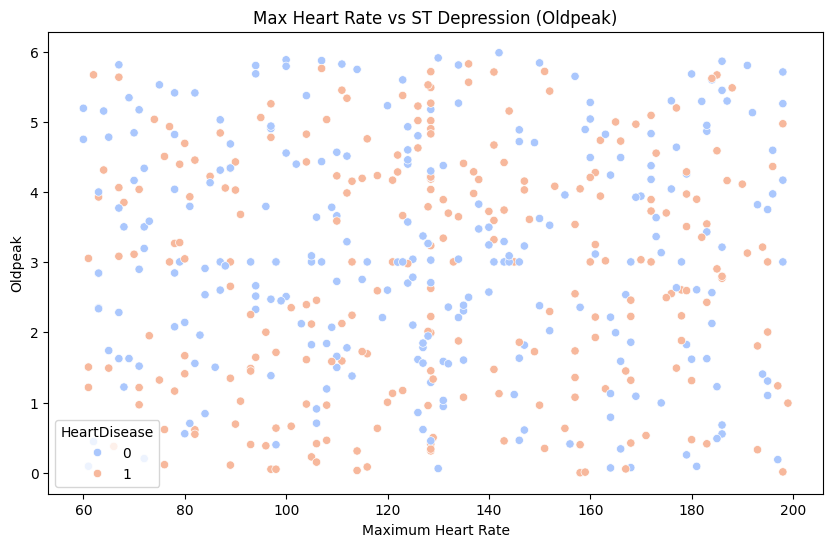

In [ ]:
# Scatter plot of MaxHR vs Oldpeak, colored by Heart Disease
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['MaxHR'], y=df_cleaned['Oldpeak'], hue=df_cleaned['HeartDisease'], palette="coolwarm")
plt.title('Max Heart Rate vs ST Depression (Oldpeak)')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Oldpeak')
plt.show()

Max Heart Rate vs ST Depression (Oldpeak):

Patients with lower MaxHR and higher Oldpeak tend to have heart disease.


Those with a higher MaxHR and lower Oldpeak are generally healthier.

Key Takeaways

✅ Age, Chest Pain Type, Cholesterol, and Exercise Angina are strong indicators of heart disease.

✅ Oldpeak and MaxHR show notable trends that can help in diagnosis.


✅ Regular checkups for asymptomatic individuals are crucial for early detection.